<a href="https://colab.research.google.com/github/6Sharky9/StableDiffusion/blob/main/Text_To_Image_Generation_using_Stable_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sun Mar  3 02:58:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install diffusers==0.11.1
!pip install transformers scipy ftfy accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 14.1 MB/s eta 0:00:00


In [ ]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

safety_checker/pytorch_model.fp16.safetensors not found


Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

pytorch_model.fp16.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

pytorch_model.fp16.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.non_ema.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

(…)fusion_pytorch_model.non_ema.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


In [ ]:
pipe = pipe.to("cuda")

**GENERATING THE IMAGES VIA PROMPT**

  0%|          | 0/50 [00:00<?, ?it/s]

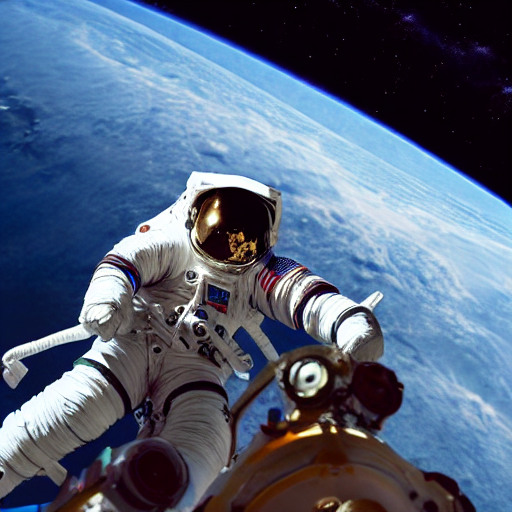

In [ ]:
prompt = "a photograph of an astronaut riding a bluewhale"
image = pipe(prompt).images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

image.save(f"astronaut_rides_horse.png")

image

In [ ]:
!pip install flask requests pillow


In [ ]:
from flask import Flask, request, send_file
import requests
from PIL import Image

app = Flask(__name__)

def generate_image(prompt):
    image = pipe(prompt).images[0]  # Your text-to-image generation code
    return image


In [ ]:
@app.route('/generate_image', methods=['POST'])
def handle_image_generation():
    prompt = request.json['prompt']  # Extract prompt from request body
    image = generate_image(prompt)

    image_file_path = 'generated_image.png'
    image.save(image_file_path)

    return send_file(image_file_path, mimetype='image/png')


In [ ]:
!pip install ngrok
!pip install pyngrok



In [ ]:
from pyngrok import ngrok

# Set your authtoken
ngrok.set_auth_token("2d5Ee4UeRpVVxt4NVmAYUXjablf_6jUu7WEXdE48jrazEJo3V")  # Replace with your actual authtoken

# Start the tunnel as before
tunnel = ngrok.connect(5000)
public_url = tunnel.public_url
print(f"Public URL: {public_url}")


Public URL: https://6d4e-34-87-66-131.ngrok-free.app


In [ ]:
import http.server
import socketserver
import urllib.parse
import ngrok
import asyncio

PORT = 8000  # Choose a suitable port

class RequestHandler(http.server.BaseHTTPRequestHandler):
    def do_GET(self):
        query_components = urllib.parse.parse_qs(urllib.parse.urlparse(self.path).query)
        name = query_components.get("name", [""])[0]  # Retrieve the "name" parameter

        if name == "rohan":
            self.send_response(200)
            self.send_header("Content-type", "text/plain")
            self.end_headers()
            self.wfile.write(b"hi")
        else:
            self.send_response(403)  # Access denied
            self.send_header("Content-type", "text/plain")
            self.end_headers()
            self.wfile.write(b"Access denied")

# Create the server and ngrok tunnel
with socketserver.TCPServer(("", PORT), RequestHandler) as httpd:
    # Create a variable to store the public URL (initially empty)
    public_url = [None]

    # Create an asynchronous function
    async def create_and_run_tunnel():
        # Disconnect all existing tunnels
        for tunnel in ngrok.get_tunnels():
            await ngrok.disconnect(tunnel.public_url)

        # Check if a tunnel already exists
        if public_url[0] is None:
            ngrok.set_auth_token("2d5Ee4UeRpVVxt4NVmAYUXjablf_6jUu7WEXdE48jrazEJo3V")  # Replace with your actual token
            tunnel = await ngrok.connect(PORT)
            if tunnel:
                public_url[0] = tunnel.public_url
                print("Public URL:", public_url[0])  # Print the public URL within the function

    # Run the task asynchronously within Colab's loop
    loop = asyncio.get_running_loop()
    loop.create_task(create_and_run_tunnel())

    # Wait for the public URL to be available (optional)
    while public_url[0] is None:
        await asyncio.sleep(0.1)  # Yield control briefly to allow the task to run

    print("Serving on port", PORT)  # Print this after the public URL is set

    # Start the server
    httpd.serve_forever()


ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-16' coro=<create_and_run_tunnel() done, defined at <ipython-input-42-8638befb2c6c>:31> exception=AttributeError("module 'ngrok' has no attribute 'get_tunnels'")>
Traceback (most recent call last):
  File "<ipython-input-42-8638befb2c6c>", line 33, in create_and_run_tunnel
    for tunnel in ngrok.get_tunnels():
AttributeError: module 'ngrok' has no attribute 'get_tunnels'


CancelledError: 

In [ ]:
from flask import Flask, request, send_file
from PIL import Image
from pyngrok import ngrok
import os  # Added import

# Set ngrok authtoken (replace with your actual token)
ngrok.set_auth_token("2d5Ee4UeRpVVxt4NVmAYUXjablf_6jUu7WEXdE48jrazEJo3V")  # Place your ngrok authtoken here

# Function to generate image using your existing code
def generate_image(prompt):
    image = pipe(prompt).images[0]  # Using your image generation code
    return image

app = Flask(__name__)

@app.route('/generate_image', methods=['POST'])
def handle_image_generation():
    # Print received prompt and running operations
    print(f"Received prompt: {request.json['prompt']}")
    print("Operations running: Generating image...")

    prompt = request.json['prompt']
    try:
        image = generate_image(prompt)
        image_file_path = os.path.join('generated_image.png')  # Use os.path.join for better path handling
        image.save(image_file_path)
        return send_file(image_file_path, mimetype='image/png')
    except Exception as e:
        print(f"Error generating image: {e}")  # Log the error
        return f"Error generating image: {str(e)}", 500  # Return error response

if __name__ == '__main__':
    # Start ngrok tunnel (replace 5000 with your desired port)
    tunnel = ngrok.connect(5000)
    public_url = tunnel.public_url
    print(f"Public URL: {public_url}")  # Print the public URL

    app.run(debug=True)


Public URL: https://086e-34-87-66-131.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


  0%|          | 0/50 [00:00<?, ?it/s]

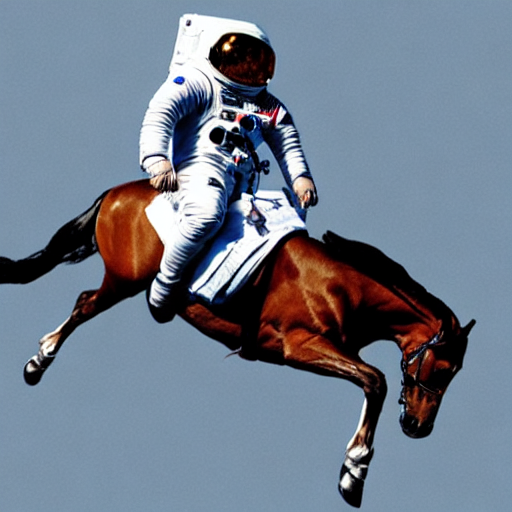

In [ ]:
import torch

generator = torch.Generator("cuda").manual_seed(1024)

image = pipe(prompt, generator=generator).images[0]

image

 **FOR ALTERNATE GRID IMAGES**

In [ ]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

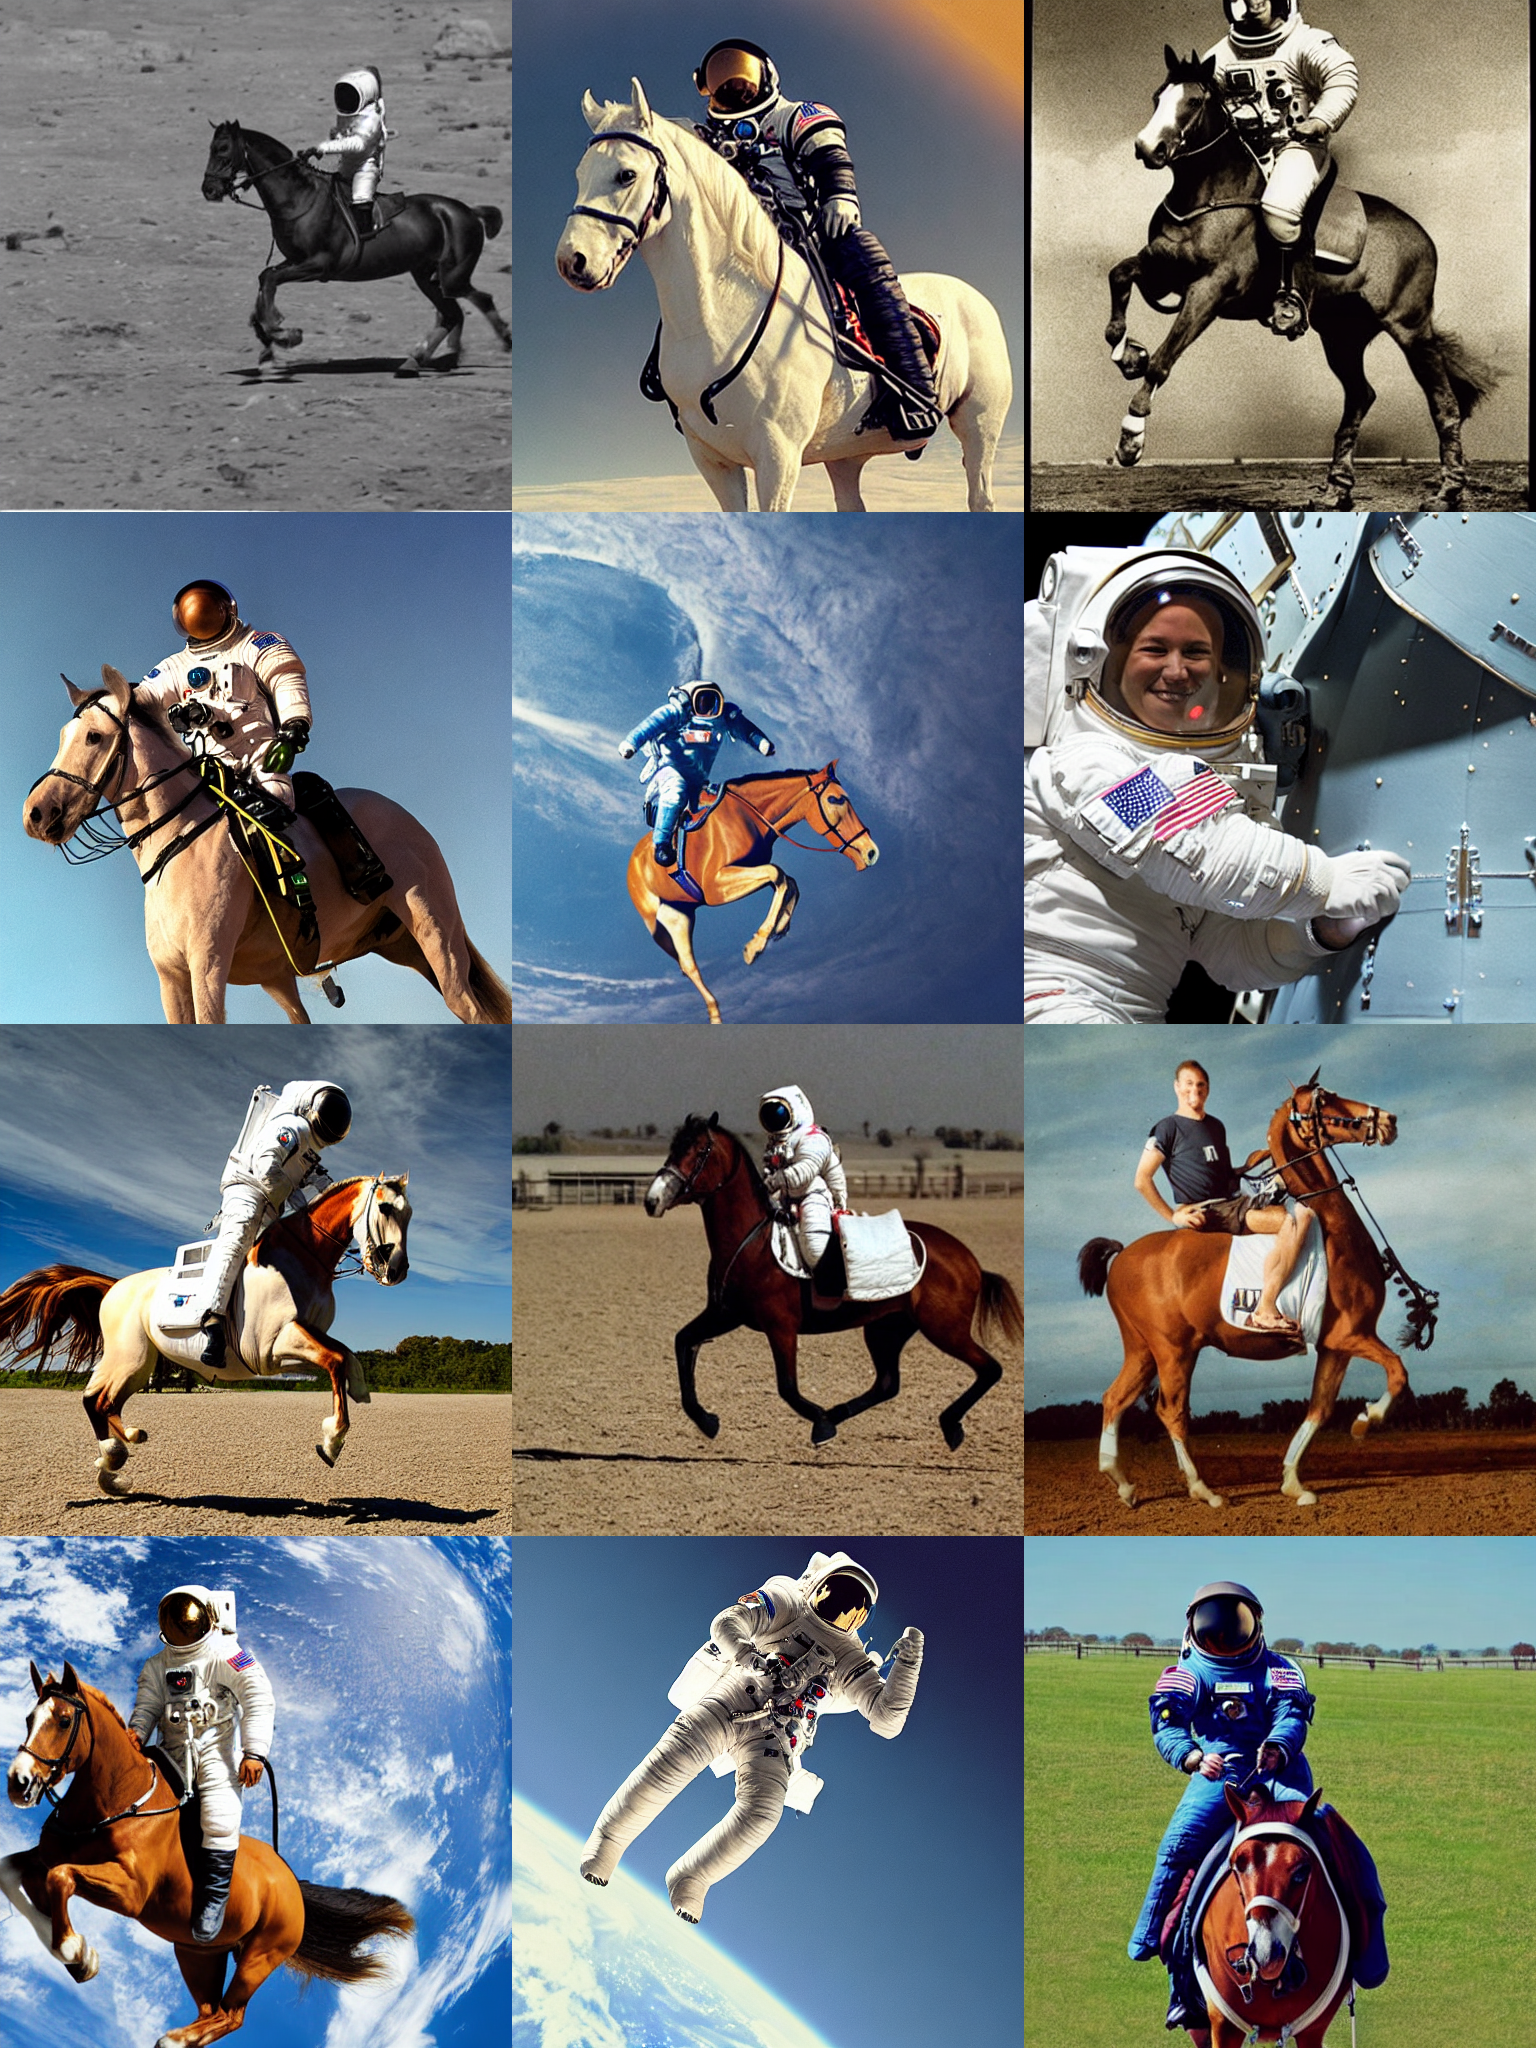

In [ ]:
num_cols = 3
num_rows = 4

prompt = ["a photograph of an astronaut riding a horse"] * num_cols

all_images = []
for i in range(num_rows):
  images = pipe(prompt).images
  all_images.extend(images)

grid = image_grid(all_images, rows=num_rows, cols=num_cols)
grid

**FOR NON SQUARE IMAGES**

  0%|          | 0/50 [00:00<?, ?it/s]

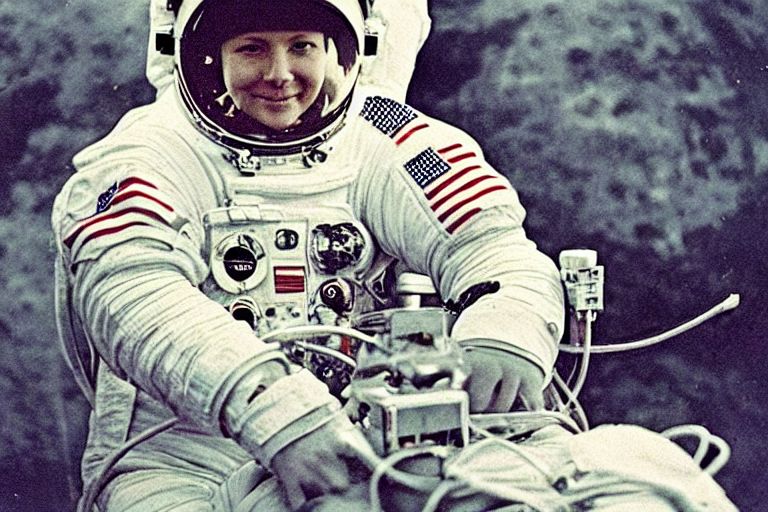

In [ ]:
prompt = "a photograph of an astronaut riding a horse"

image = pipe(prompt, height=512, width=768).images[0]
image

In [ ]:
!pip install flask-ngrok
